In [1]:
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import matplotlib.pyplot as plt

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
#df=pd.read_csv(os.getcwd() + '\..\..Examples\EFIplus_mdeit.zip', compression='zip',sep=";" ) para ficheiros em pastas diferentes

In [3]:
# Create a new column with species richness
df['species_richness'] = df.groupby('site')['species'].transform('nunique')



KeyError: 'site'

AttributeError: module 'statsmodels.stats' has no attribute 'add_constant'

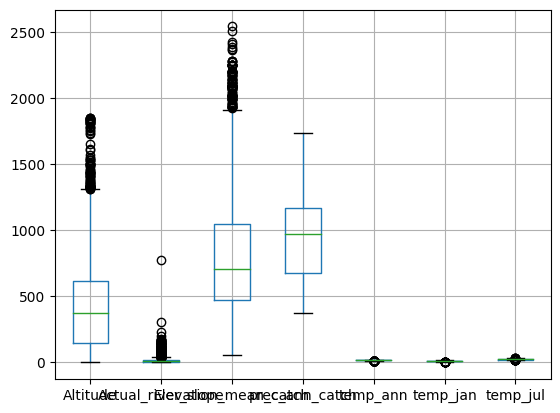

In [4]:
# Check if any of the variables require transformation using boxplots
df.boxplot(column=['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul'])

# Log-transform the variable 'prec_ann_catch' as it has a skewed distribution
df['prec_ann_catch_log'] = np.log(df['prec_ann_catch'])

# Run simple linear regression for each continuous variable
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch_log', 'temp_ann', 'temp_jan', 'temp_jul']

for var in variables:
    # Create a model
    X = df[var]
    X = stm.add_constant(X)
    y = df['species_richness']
    model = stm.OLS(y, X)
    
    # Fit the model
    results = model.fit()
    
    # Print the regression coefficients, r-square and F-statistics
    print(f"\nRegression analysis for {var}:")
    print("Coefficients:", results.params)
    print("R-squared:", results.rsquared)
    print("F-statistics:", results.fvalue)
